In [913]:
import sys
sys.path.append("../../src")

In [914]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [915]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [916]:
import data

In [917]:
# set db path hackily
data._get_connection("../../data/participants.db")

EXPERIMENT_ID = "07_comprehension_spray-load-construction-meaning-with-images"

# If True, only use image trial practice/filler items to filter subjects.
FILTER_ONLY_IMAGE_TRIALS = True

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")]
image_response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-image-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [918]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

print(f"Dropping {image_response_df.index.duplicated().sum()} dupe results.")
image_response_df = image_response_df[~image_response_df.index.duplicated()]

Dropping 0 dupe results.
Dropping 0 dupe results.


In [919]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

image_response_df = pd.concat([image_response_df,
                               image_response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                              axis=1) \
    .drop(columns="condition_id")

In [920]:
for df in [response_df, image_response_df]:
    # Convert condition_id to independent features
    df["theme_is_object"] = df["condition_0"] == 1
    df["location_is_heavy"] = df["condition_1"] == 1
    df["theme_is_heavy"] = df["condition_2"] == 1
    
    # dtype fixes
    df["dateTime"] = pd.to_datetime(df.dateTime, unit="ms")

In [921]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

response_df["slider_copout"] = response_df.slider_copout.astype(bool)

In [922]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,theme_is_object,location_is_heavy,theme_is_heavy,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
5,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,6765.0,0.0-5.0,2021-10-08 16:44:29.463,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,fill,full,False,False,False,NaN
6,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5431.7,0.0-6.0,2021-10-08 16:44:34.898,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,cover,empty,False,False,False,NaN
8,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5877.4,0.0-8.0,2021-10-08 16:44:42.887,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,practice,cover,full,False,False,False,NaN
11,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5444.6,0.0-11.0,2021-10-08 16:44:56.655,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,0,0,0,False,False,False,NaN
12,A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,0,0,3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV,A3TLSCR9CC6M1A,3BAWBGQGYLNRX6TKBCH5IPVKI207VC,html-slider-response-with-copout,5597.9,0.0-12.0,2021-10-08 16:45:02.255,07_comprehension_spray-load-construction-meani...,...,True,NaN,NaN,0,0,0,False,False,False,NaN


In [923]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [924]:
N = len(response_df.reset_index().uniqueid.unique())
N

65

### Demo

In [925]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

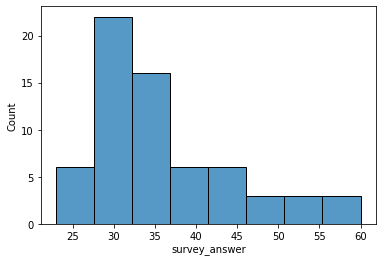

In [926]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-1.0")].survey_answer.astype(int, errors="ignore")
sns.histplot(ages)

In [927]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree               36
Master's degree                 14
Some college                    10
High school/GED                  3
Did not complete high school     2
Name: survey_answer, dtype: int64

In [928]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    63
No      2
Name: survey_answer, dtype: int64

### Comments

In [929]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-1.0")].survey_answer)

['nothing',
 'no',
 'INTERESTING',
 'its an awesome study',
 'good',
 'IT IS EASY TO UNDERSTAND THANK YOU TEAM',
 'nice',
 '',
 '',
 'GOOD',
 'great',
 '',
 'good',
 '',
 'Thanks!',
 'good',
 'Good',
 '',
 '',
 '',
 'good',
 'Interesting',
 'very interesting experiment',
 '',
 '',
 'nocomments',
 'like it',
 'none',
 'None',
 'Such a good.',
 '',
 'no',
 '',
 'none',
 'no',
 'on',
 'goos',
 'golod',
 'No',
 'GOOD',
 'good',
 'This was pretty easy and enjoyable to do. I was expecting harder or weird words and phrases.',
 '',
 'manager',
 'VERY NICE',
 'GOOD',
 'interesting',
 'VERY NICE SURVEY',
 '',
 '',
 '',
 'I like this experiment',
 'no',
 'None.',
 'good',
 'good',
 '',
 '',
 'good',
 '',
 '',
 '',
 '',
 '',
 '']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

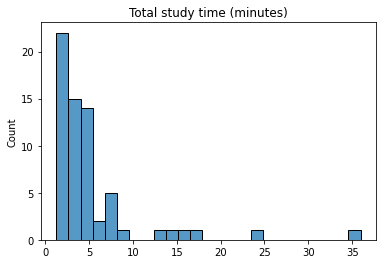

In [930]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [931]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.232917
std     5.599752
Name: rt, dtype: float64

### Response times

In [932]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

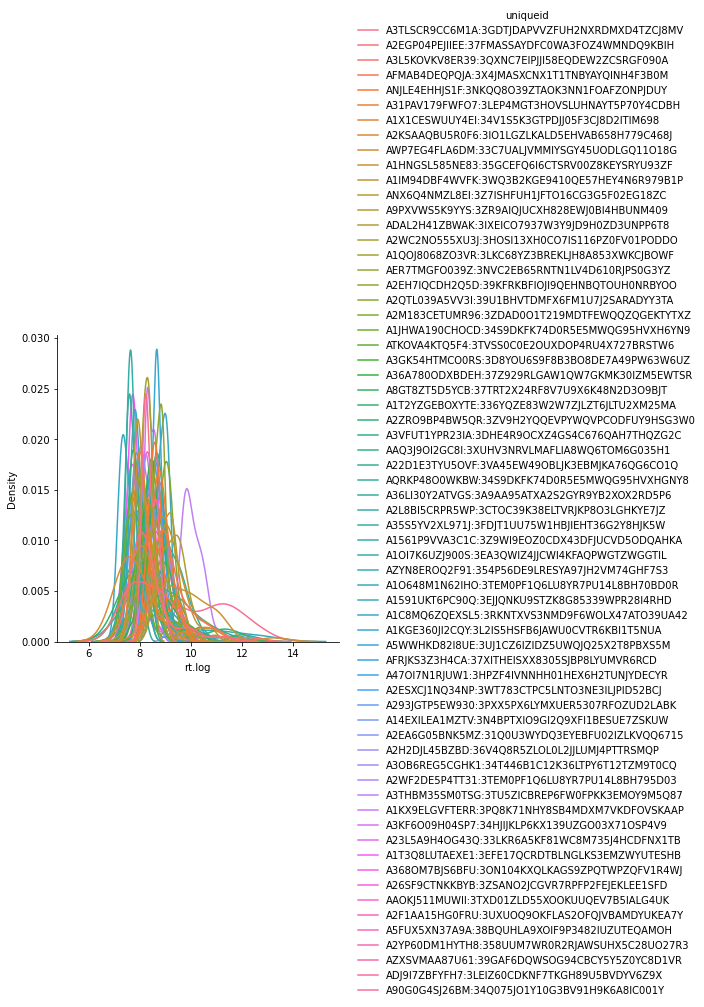

In [933]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [934]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

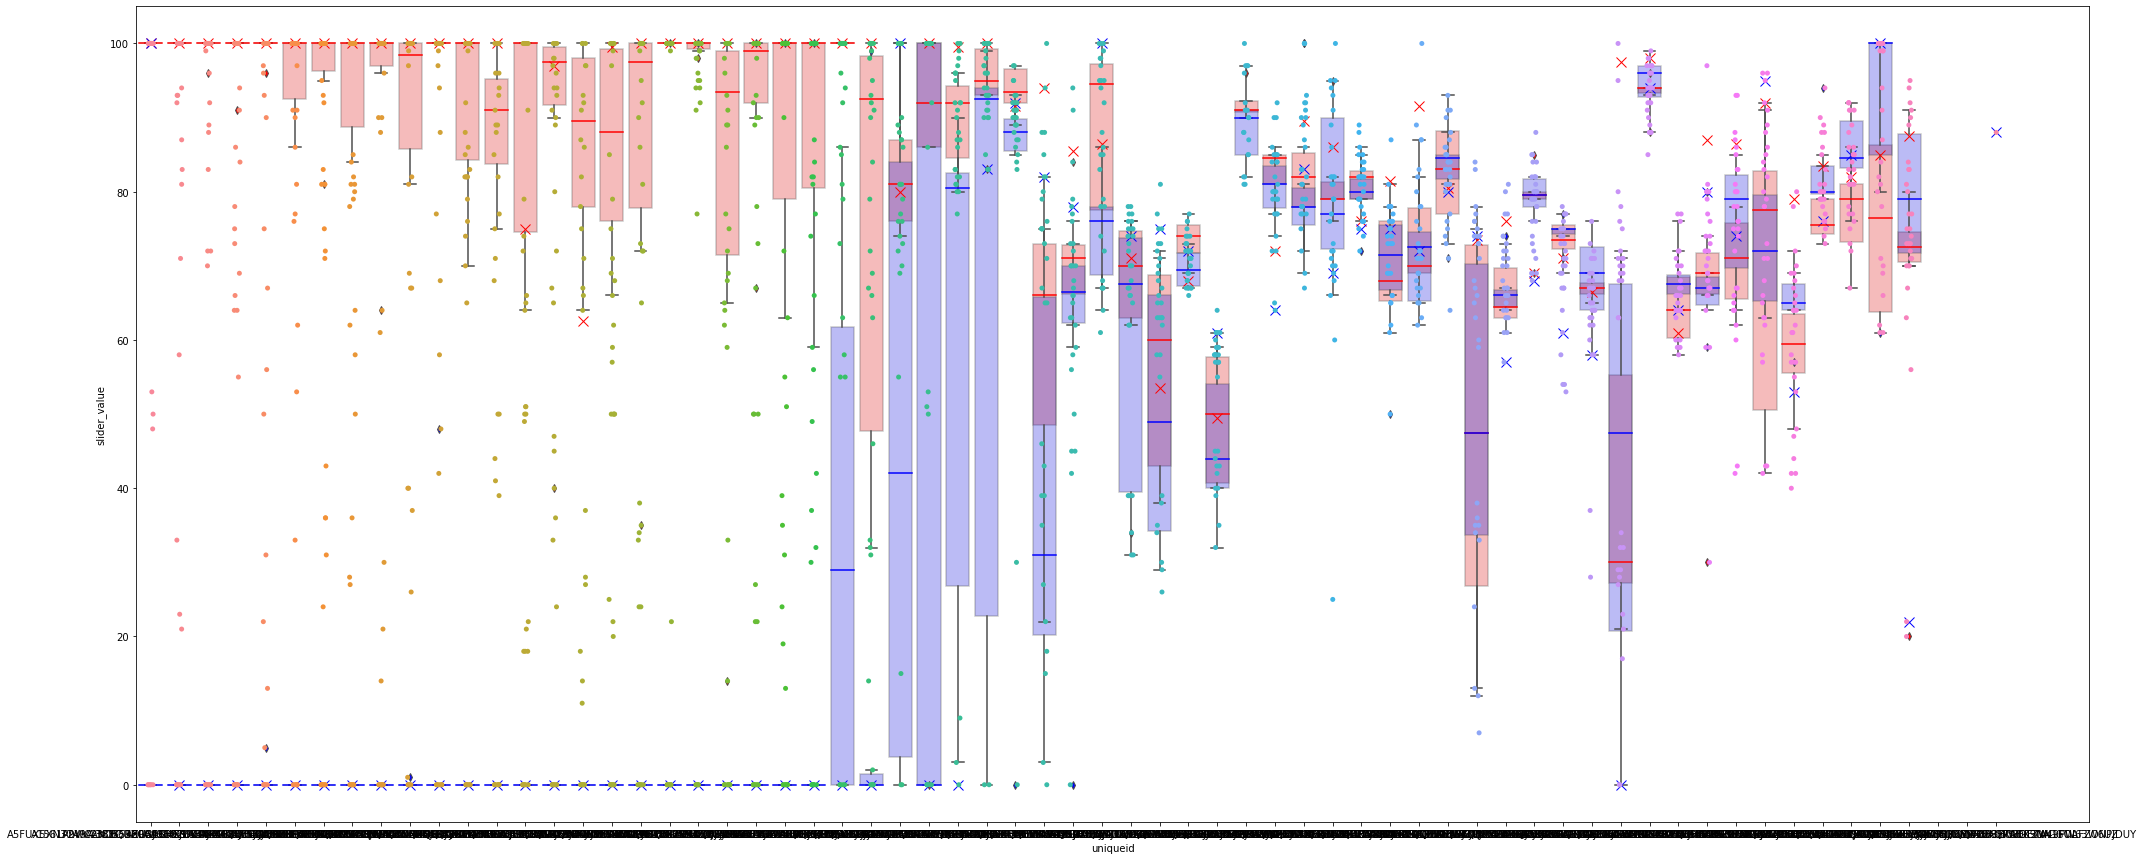

In [935]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [936]:
slider_practice_df = response_df[response_df.condition_0 == "practice"].copy()
slider_practice_df["match"] = slider_practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
slider_practice_df["practice_id"] = slider_practice_df.condition_1.str.cat(slider_practice_df.condition_2)
slider_practice_df["practice_type"] = "slider"

In [937]:
image_practice_df = image_response_df[image_response_df.condition_0 == "practice"].copy()
image_practice_df["match"] = image_practice_df.apply(lambda r: r.response == "max" if r.condition_2 == "full" else r.response == "min", axis=1)
image_practice_df["practice_id"] = image_practice_df.condition_1.str.cat(image_practice_df.condition_2)
image_practice_df["practice_type"] = "image"

In [938]:
if FILTER_ONLY_IMAGE_TRIALS:
    practice_df = image_practice_df
else:
    practice_df = pd.concat([slider_practice_df, image_practice_df], axis=0)

In [939]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = set()

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [940]:
practice_df.groupby(["trial_index", "practice_type", "practice_id"]).match.mean()

trial_index  practice_type  practice_id
4            image          fillfull       0.830769
7            image          fillempty      0.723077
Name: match, dtype: float64

In [941]:
if not FILTER_ONLY_IMAGE_TRIALS:
    plt.subplots(figsize=(10, 10))

    corr_df = practice_df.groupby(["uniqueid", "practice_type"]).match.mean().unstack()
    corr_df += np.random.random(size=(len(corr_df), 2)) * 0.075
    sns.scatterplot(data=corr_df.reset_index(),
                    x="image", y="slider", alpha=0.7)
    plt.title("Practice accuracy on slider vs. image trials, by subject")

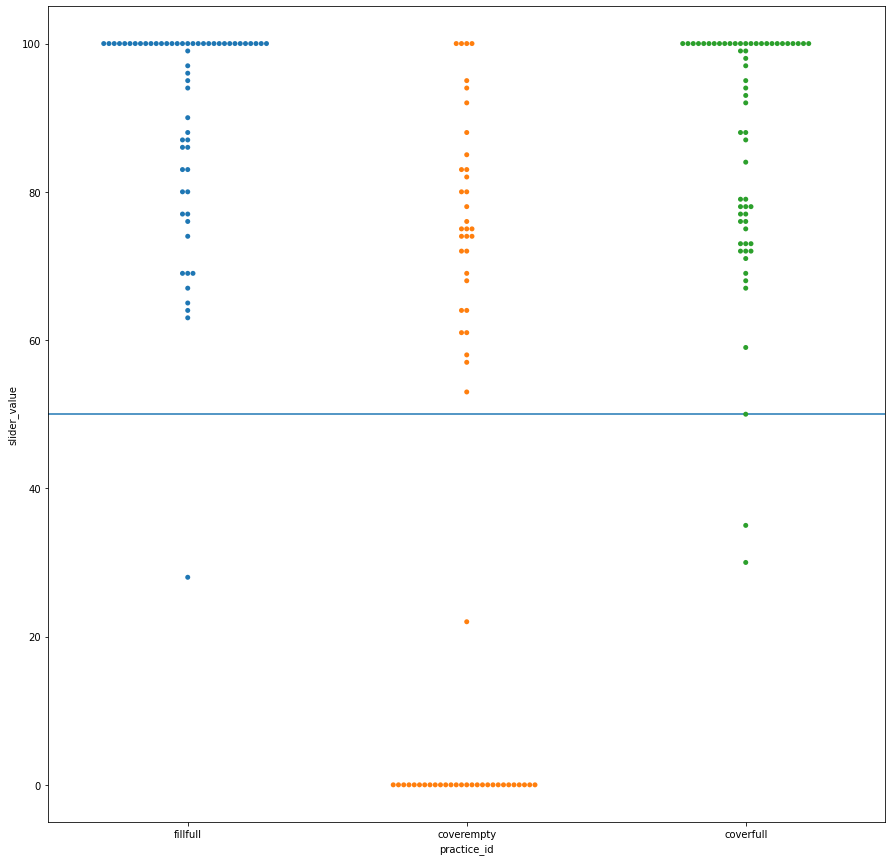

In [942]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=slider_practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [943]:
slider_practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
fillfull,0.092308,65
coverfull,0.061538,65
coverempty,0.046154,65


### Fillers

<AxesSubplot:xlabel='t'>

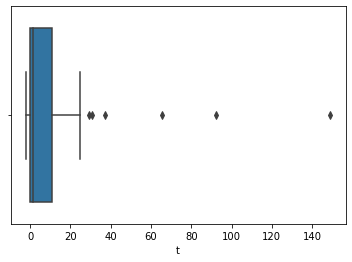

In [944]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [945]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A1X1CESWUUY4EI:34V1S5K3GTPDJJ05F3CJ8D2ITIM698,-2.123677,5.965316e-02
A1HNGSL585NE83:35GCEFQ6I6CTSRV00Z8KEYSRYU93ZF,-1.660861,1.353196e-01
A1KX9ELGVFTERR:3PQ8K71NHY8SB4MDXM7VKDFOVSKAAP,-1.643853,1.312344e-01
A3L5KOVKV8ER39:3QXNC7EIPJJI58EQDEW2ZCSRGF090A,-1.503816,1.635371e-01
AZYN8EROQ2F91:354P56DE9LRESYA97JH2VM74GHF7S3,-1.406285,1.899453e-01
A3VFUT1YPR23IA:3DHE4R9OCXZ4GS4C676QAH7THQZG2C,-1.101929,2.963068e-01
A47OI7N1RJUW1:3HPZF4IVNNHH01HEX6H2TUNJYDECYR,-0.833076,4.242520e-01
A1QOJ8068ZO3VR:3LKC68YZ3BREKLJH8A853XWKCJBOWF,-0.755796,4.672016e-01
A1C8MQ6ZQEXSL5:3RKNTXVS3NMD9F6WOLX47ATO39UA42,-0.701287,4.991181e-01


#### Filler copouts

In [946]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
2.0,empty,0.076923,5,65
9.0,full,0.076923,5,65
11.0,full,0.076923,5,65
0.0,empty,0.061538,4,65
4.0,empty,0.061538,4,65
1.0,empty,0.046154,3,65
3.0,empty,0.046154,3,65
5.0,empty,0.046154,3,65
6.0,full,0.046154,3,65


#### Filler failures by item

In [947]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-947-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [948]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.523077
             1.0        0.461538
             2.0        0.476923
             3.0        0.415385
             4.0        0.384615
             5.0        0.492308
full         6.0        0.907692
             7.0        0.876923
             8.0        0.876923
             9.0        0.876923
             10.0       0.876923
             11.0       0.846154
Name: match, dtype: float64

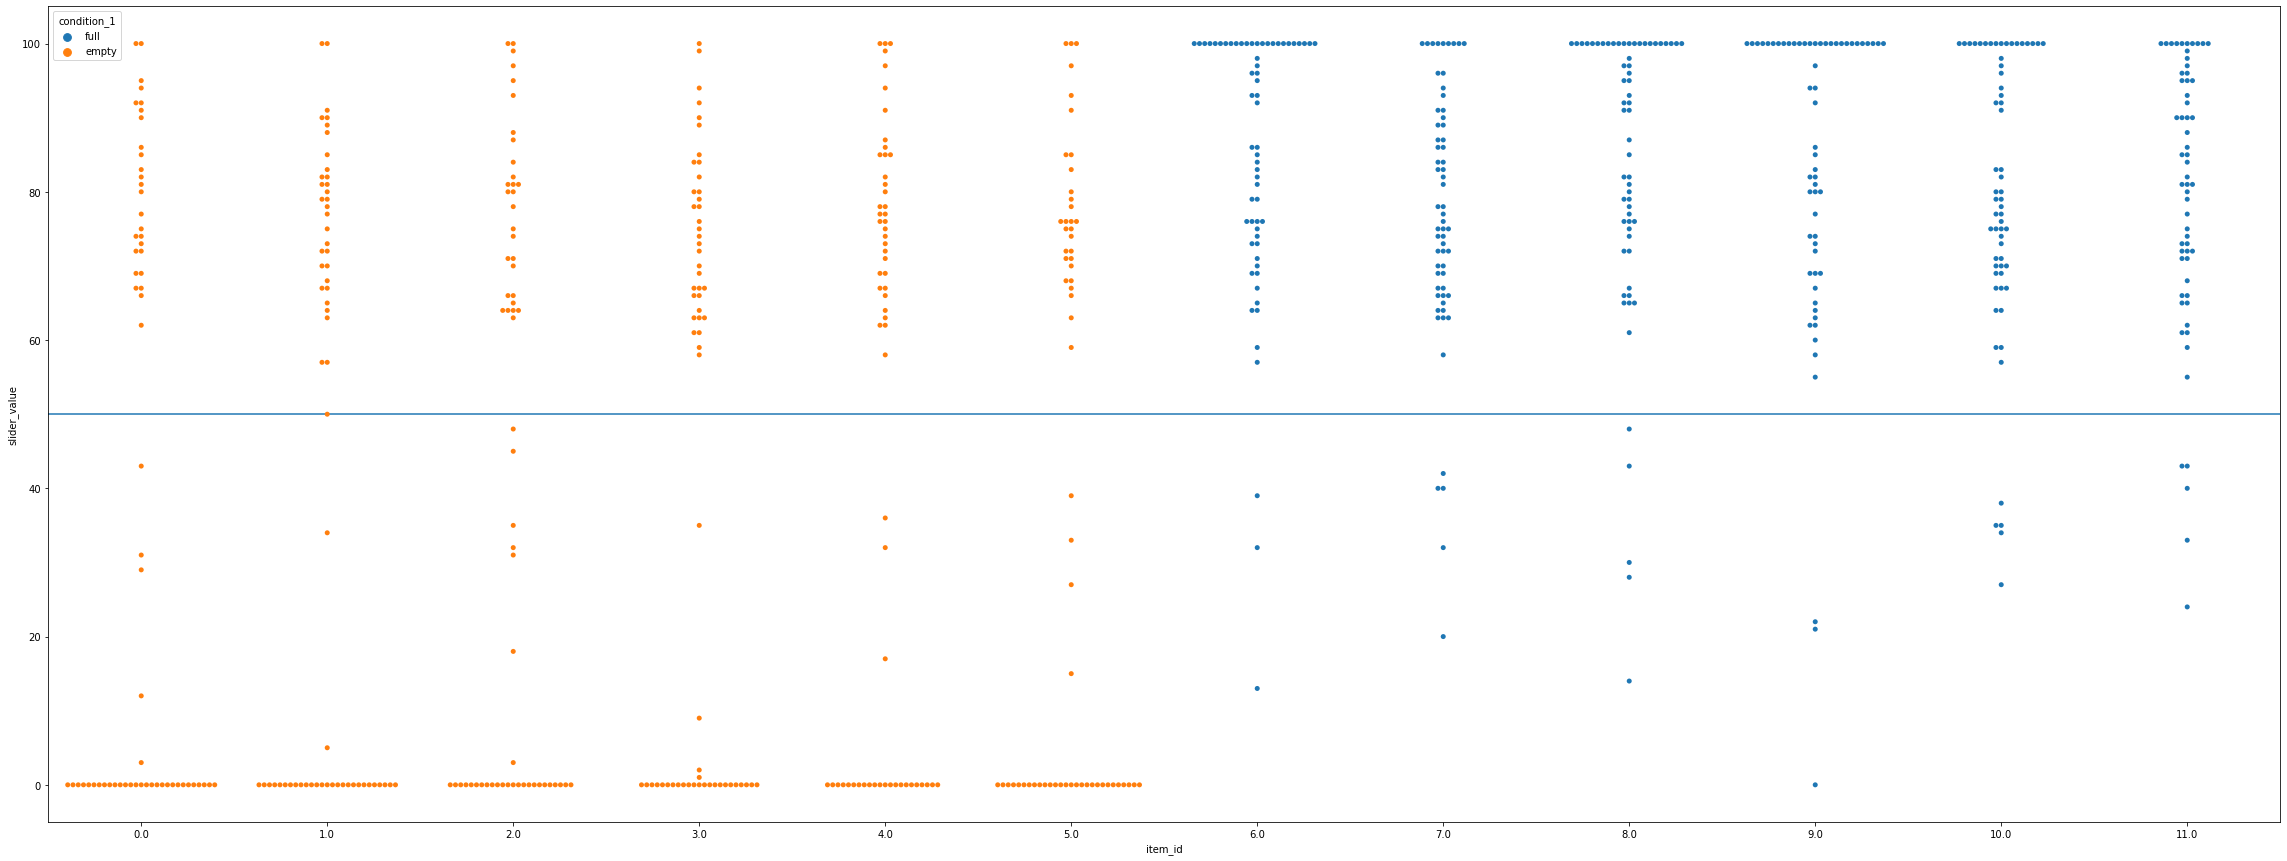

In [949]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

### Practice image performance vs. filler performance

<AxesSubplot:xlabel='match_slider_filler', ylabel='match_image'>

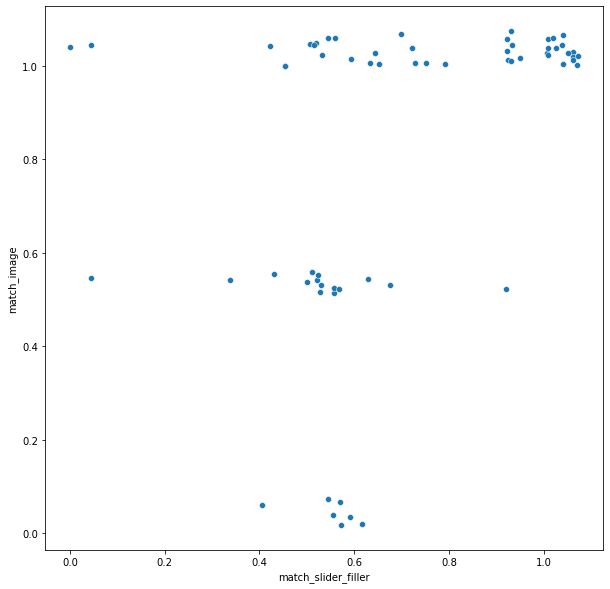

In [950]:

# sns.scatterplot(data=filler_stats.join(image_practice_df.groupby("uniqueid").match.mean()),
#                 x="t", y="match")

plt.subplots(figsize=(10, 10))
corr_df = pd.merge(filler_df.groupby("uniqueid").match.mean(), image_practice_df.groupby("uniqueid").match.mean(),
                   left_index=True, right_index=True, suffixes=("_slider_filler", "_image"))
corr_df += np.random.random(size=(len(corr_df), 2)) * 0.075
sns.scatterplot(data=corr_df,
                x="match_slider_filler", y="match_image")

## Final data processing

In [951]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]
exp_image_items = image_response_df[~(image_response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [952]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")
exp_image_items = exp_image_items.drop(practice_drops, level="uniqueid")

if not FILTER_ONLY_IMAGE_TRIALS:
    attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
    drop_pct = np.round(len(attention_drops) / N * 100, 1)
    print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
    print("\t" + "\n\t".join(attention_drops.index))
    exp_items = exp_items.drop(attention_drops.index, level="uniqueid")
    exp_image_items = exp_image_items.drop(attention_drops.index, level="uniqueid")

22 subjects (33.8%) disqualified and dropped due to failed practice.
	A14EXILEA1MZTV:3N4BPTXIO9GI2Q9XFI1BESUE7ZSKUW
	A9PXVWS5K9YYS:3ZR9AIQJUCXH828EWJ0BI4HBUNM409
	A1C8MQ6ZQEXSL5:3RKNTXVS3NMD9F6WOLX47ATO39UA42
	A2L8BI5CRPR5WP:3CTOC39K38ELTVRJKP8O3LGHKYE7JZ
	A1HNGSL585NE83:35GCEFQ6I6CTSRV00Z8KEYSRYU93ZF
	A1KGE360JI2CQY:3L2IS5HSFB6JAWU0CVTR6KBI1T5NUA
	ANJLE4EHHJS1F:3NKQQ8O39ZTAOK3NN1FOAFZONPJDUY
	A3VFUT1YPR23IA:3DHE4R9OCXZ4GS4C676QAH7THQZG2C
	A3TLSCR9CC6M1A:3GDTJDAPVVZFUH2NXRDMXD4TZCJ8MV
	A2WF2DE5P4TT31:3TEM0PF1Q6LU8YR7PU14L8BH795D03
	A1JHWA190CHOCD:34S9DKFK74D0R5E5MWQG95HVXH6YN9
	A1T3Q8LUTAEXE1:3EFE17QCRDTBLNGLKS3EMZWYUTESHB
	A1KX9ELGVFTERR:3PQ8K71NHY8SB4MDXM7VKDFOVSKAAP
	AWP7EG4FLA6DM:33C7UALJVMMIYSGY45UODLGQ11O18G
	A23L5A9H4OG43Q:33LKR6A5KF81WC8M735J4HCDFNX1TB
	A2ESXCJ1NQ34NP:3WT783CTPC5LNTO3NE3ILJPID52BCJ
	A47OI7N1RJUW1:3HPZF4IVNNHH01HEX6H2TUNJYDECYR
	AAQ3J9OI2GC8I:3XUHV3NRVLMAFLIA8WQ6TOM6G035H1
	A1QOJ8068ZO3VR:3LKC68YZ3BREKLJH8A853XWKCJBOWF
	AZYN8EROQ2F91:354P56DE9LRESYA97JH2VM74GHF7

In [953]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

43 subjects remaining.


### Merge in materials

In [954]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["item_key"] = materials_df.V.str.cat(materials_df["T"], sep=" ")

# NB this doesn't handle fillers correctly

In [955]:
keep_cols = ["item_key", "T", "T heavy", "L", "L heavy", "V", "V pres", "scale type", "T plural?", "T mass?", "L plural?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)
merged_image_df = pd.merge(exp_image_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

#### Add frequency data

In [956]:
freqs = {}
with open("../../data/wikitext-2_train_vocab.txt") as f:
    for line in f:
        if line.strip():
            token, freq = line.strip().split("\t")
            freqs[token.strip()] = int(freq)

In [957]:
merged_df["V freq"] = merged_df["V pres"].map(freqs)

### Filter out items which were dropped in later materials iterations

In [958]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, spray-load-003-images.


### Export

In [959]:
merged_df.to_csv("merged_df.csv")
merged_image_df.to_csv("merged_image_df.csv")

## Basic visualization: construction meaning

In [960]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

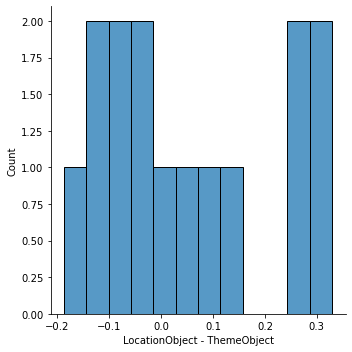

In [961]:
sns.displot(item_differences, bins=12)

In [962]:
item_differences.sort_values(ascending=False)

item_id  item_key                  T mass?  scale type
34.0     sprinkle nuts             False    cover         0.329559
12.0     load hay                  True     fill          0.301943
10.0     inject jelly              True     fill          0.280040
16.0     plant lavender seedlings  False    cover         0.263664
32.0     spray paint               True     cover         0.150241
4.0      dab ointment              True     cover         0.077674
41.0     stuff money               True     fill          0.037396
19.0     rub marinade              True     cover        -0.003766
26.0     smear grease              True     cover        -0.031651
1.0      cram clothes              True     fill         -0.036635
9.0      heap appetizers           False    cover        -0.066093
25.0     slather mayonnaise        True     cover        -0.076207
14.0     pack soil                 True     fill         -0.118824
36.0     stack books               False    fill         -0.136036
35.0   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'squirt water'),
  Text(1, 0, 'stack books'),
  Text(2, 0, 'pack soil'),
  Text(3, 0, 'slather mayonnaise'),
  Text(4, 0, 'heap appetizers'),
  Text(5, 0, 'cram clothes'),
  Text(6, 0, 'smear grease'),
  Text(7, 0, 'rub marinade'),
  Text(8, 0, 'stuff money'),
  Text(9, 0, 'dab ointment'),
  Text(10, 0, 'spray paint'),
  Text(11, 0, 'plant lavender seedlings'),
  Text(12, 0, 'inject jelly'),
  Text(13, 0, 'load hay'),
  Text(14, 0, 'sprinkle nuts')])

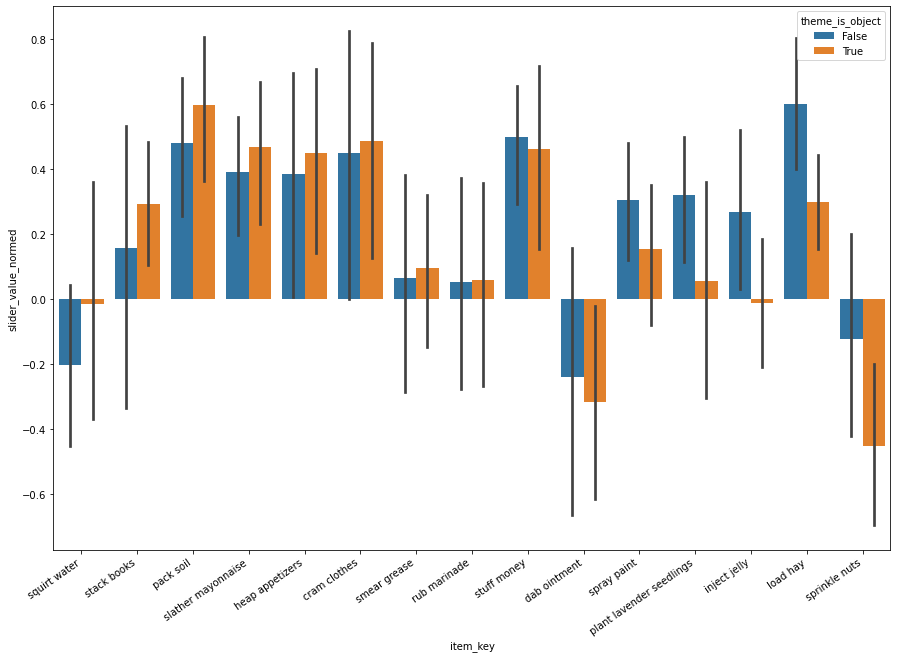

In [963]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="item_key", hue="theme_is_object", y="slider_value_normed",
            order=item_differences.sort_values().index.get_level_values("item_key"))
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='T mass?', ylabel='LocationObject - ThemeObject'>

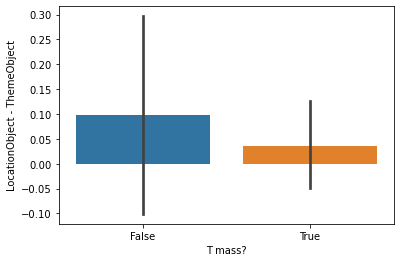

In [964]:
sns.barplot(data=item_differences.reset_index(), x="T mass?", y="LocationObject - ThemeObject")

### By scale type

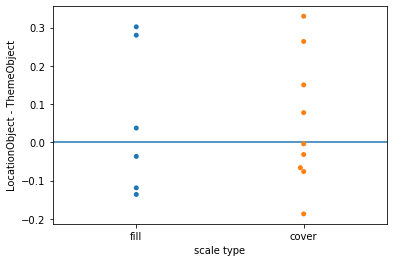

In [965]:
ax = sns.swarmplot(data=item_differences.reset_index(), x="scale type", y="LocationObject - ThemeObject")
ax.axhline(0)

### Copouts

In [966]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [967]:
copouts = merged_df.groupby(["materials_id", "item_id", "theme_is_object"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "theme_is_object"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

,slider_copout,sum,count,mean
item_id,theme_is_object,,,
10.0,False,3,18,0.166667
16.0,True,2,16,0.125000
4.0,True,2,18,0.111111
19.0,False,2,19,0.105263
26.0,True,2,21,0.095238
12.0,True,2,22,0.090909
34.0,True,2,23,0.086957
25.0,True,2,23,0.086957
41.0,True,2,24,0.083333


<AxesSubplot:xlabel='item_key', ylabel='slider_copout'>

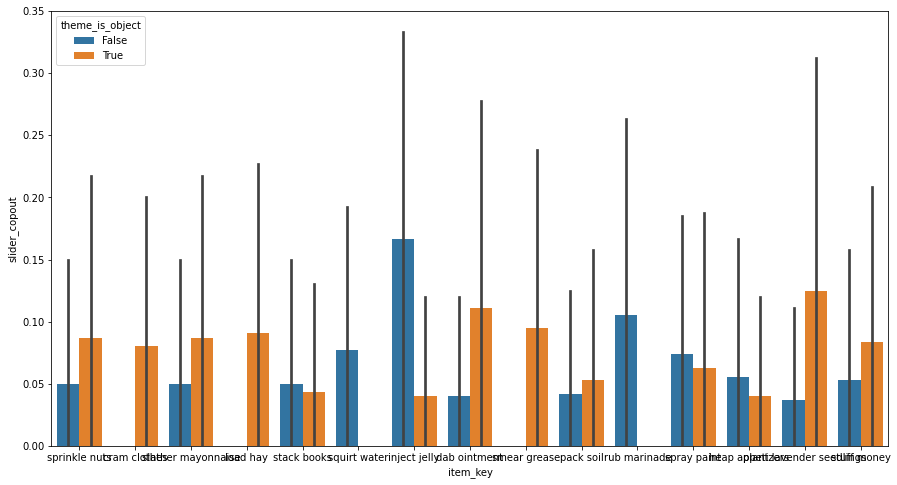

In [968]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="item_key", y="slider_copout", hue="theme_is_object")

<AxesSubplot:xlabel='T mass?', ylabel='slider_copout'>

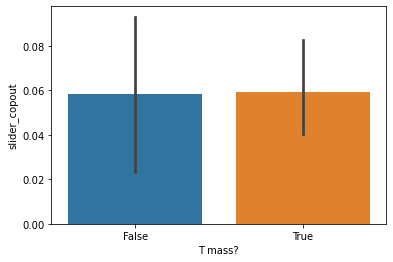

In [969]:
sns.barplot(data=merged_df, x="T mass?", y="slider_copout")

## Basic analysis: image trials

<AxesSubplot:xlabel='theme_is_object', ylabel='chose_max'>

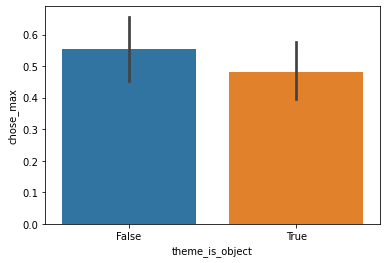

In [970]:
merged_image_df["chose_max"] = merged_image_df["response"] == "max"
sns.barplot(data=merged_image_df.reset_index(), x="theme_is_object", y="chose_max")

<AxesSubplot:xlabel='item_key', ylabel='chose_max'>

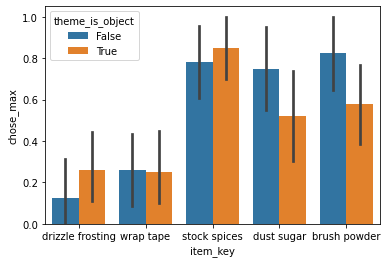

In [971]:
sns.barplot(data=merged_image_df.reset_index(), x="item_key", hue="theme_is_object", y="chose_max")

In [972]:
merged_image_df.groupby(["item_key", "theme_is_object"]).chose_max.agg(["mean", "count"])

mean  count
item_key         theme_is_object                 
brush powder     False            0.823529     17
                 True             0.576923     26
drizzle frosting False            0.125000     16
                 True             0.259259     27
dust sugar       False            0.750000     20
                 True             0.521739     23
stock spices     False            0.782609     23
                 True             0.850000     20
wrap tape        False            0.260870     23
                 True             0.250000     20

In [980]:
# Compute by-item slider difference of means between conditions
from scipy.stats import ttest_ind
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return ttest_ind(location_rows.chose_max, theme_rows.chose_max)#location_rows.chose_max.mean() - theme_rows.chose_max.mean()

merged_image_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

item_id  item_key          T mass?  scale type
0.0      brush powder      True     cover         (1.7049788484633073, 0.09576567941584341)
6.0      drizzle frosting  True     cover         (-1.0347008113132123, 0.3068733040686109)
7.0      dust sugar        True     cover          (1.5518683490593768, 0.1283795323976782)
38.0     stock spices      False    fill          (-0.5551648226880769, 0.5817984563080413)
43.0     wrap tape         True     cover         (0.07956924085928632, 0.9369669711118922)
Name: LocationObject - ThemeObject, dtype: object

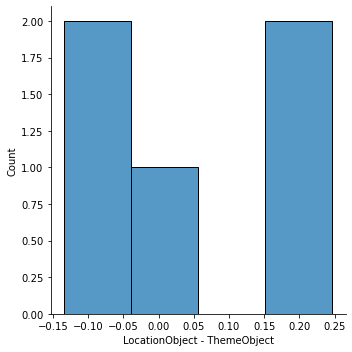

In [974]:
sns.displot(image_item_differences)

In [975]:
image_item_differences.sort_values()

item_id  item_key          T mass?  scale type
6.0      drizzle frosting  True     cover        -0.134259
38.0     stock spices      False    fill         -0.067391
43.0     wrap tape         True     cover         0.010870
7.0      dust sugar        True     cover         0.228261
0.0      brush powder      True     cover         0.246606
Name: LocationObject - ThemeObject, dtype: float64

### Compare image responses with slider responses from exp 05

In [976]:
exp05_df = pd.read_csv("../05_comprehension_spray-load-construction-meaning/merged_df.csv")
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("theme_is_object")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    theme_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - theme_rows.slider_value_normed.mean()

exp05_item_differences = exp05_df.groupby(["item_id", "item_key", "T mass?", "scale type"]) \
    .apply(compute_item_difference) \
    .rename("LocationObject - ThemeObject")

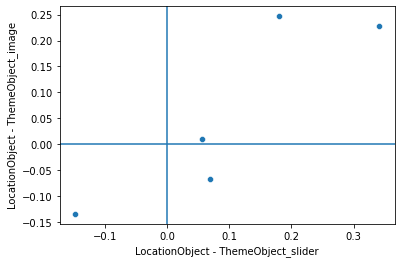

In [977]:
comp_df = pd.merge(exp05_item_differences, image_item_differences, how="inner", left_index=True, right_index=True, suffixes=("_slider", "_image"))
sns.scatterplot(data=comp_df, x="LocationObject - ThemeObject_slider", y="LocationObject - ThemeObject_image")
plt.axhline(0); plt.axvline(0)

In [978]:
comp_df

,,,,LocationObject - ThemeObject_slider,LocationObject - ThemeObject_image
item_id,item_key,T mass?,scale type,,
0.0,brush powder,True,cover,0.180276,0.246606
6.0,drizzle frosting,True,cover,-0.148821,-0.134259
7.0,dust sugar,True,cover,0.341750,0.228261
38.0,stock spices,False,fill,0.069049,-0.067391
43.0,wrap tape,True,cover,0.054975,0.010870


## Item exposure

In [979]:
merged_df.groupby(["item_id", "item_key", "theme_is_object"]).size().sort_values().head(20)

item_id  item_key                  theme_is_object
32.0     spray paint               True               16
16.0     plant lavender seedlings  True               16
35.0     squirt water              True               17
1.0      cram clothes              False              18
4.0      dab ointment              True               18
9.0      heap appetizers           False              18
10.0     inject jelly              False              18
41.0     stuff money               False              19
14.0     pack soil                 True               19
19.0     rub marinade              False              19
36.0     stack books               False              20
34.0     sprinkle nuts             False              20
25.0     slather mayonnaise        False              20
26.0     smear grease              True               21
12.0     load hay                  False              21
26.0     smear grease              False              22
12.0     load hay                  Tr